In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12.00, 4.00]
plt.rcParams['figure.autolayout'] = True

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [100]:
pokemondf = pd.read_csv('pokemon.csv', sep=';')

In [101]:
pokemondf

,national_number,gen,english_name,japanese_name,primary_type,secondary_type,classification,percent_male,percent_female,height_m,weight_kg,capture_rate,base_egg_steps,hp,attack,defense,sp_attack,sp_defense,speed,abilities_0,abilities_1,abilities_2,abilities_hidden,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fighting,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,is_sublegendary,is_legendary,is_mythical,evochain_0,evochain_1,evochain_2,evochain_3,evochain_4,evochain_5,evochain_6,gigantamax,mega_evolution,mega_evolution_alt,description
0,1,I,Bulbasaur,Fushigidane,grass,poison,Seed Pokémon,88.14,11.86,0.7,6.9,45,5120,45,49,49,65,65,45,Overgrow,NaN,NaN,Chlorophyll,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0,0,0,Bulbasaur,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,There is a plant seed on its back right from t...
1,2,I,Ivysaur,Fushigisou,grass,poison,Seed Pokémon,88.14,11.86,1.0,13.0,45,5120,60,62,63,80,80,60,Overgrow,NaN,NaN,Chlorophyll,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0,0,0,Bulbasaur,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,"When the bulb on its back grows large, it appe..."
2,3,I,Venusaur,Fushigibana,grass,poison,Seed Pokémon,88.14,11.86,2.0,100.0,45,5120,80,82,83,100,100,80,Overgrow,NaN,NaN,Chlorophyll,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0,0,0,Bulbasaur,Level,Ivysaur,Level,Venusaur,NaN,NaN,Gigantamax Venusaur,Mega Venusaur,NaN,Its plant blooms when it is absorbing solar en...
3,4,I,Charmander,Hitokage,fire,NaN,Lizard Pokémon,88.14,11.86,0.6,8.5,45,5120,39,52,43,60,50,65,Blaze,NaN,NaN,Solar Power,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0,0,0,Charmander,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,It has a preference for hot things. When it ra...
4,5,I,Charmeleon,Lizardo,fire,NaN,Flame Pokémon,88.14,11.86,1.1,19.0,45,5120,58,64,58,80,65,80,Blaze,NaN,NaN,Solar Power,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0,0,0,Charmander,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,"It has a barbaric nature. In battle, it whips ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,VIII,Regieleki,Regieleki,electric,NaN,Electron Pokémon,NaN,NaN,1.2,145.0,3,30720,80,100,50,100,50,200,Transistor,NaN,NaN,NaN,1.0,1.0,1.0,0.5,1.00,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1,0,0,Regieleki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This Pokémon is a cluster of electrical energy...
894,895,VIII,Regidrago,Regidrago,dragon,NaN,Dragon Orb Pokémon,NaN,NaN,2.1,200.0,3,30720,200,100,50,100,50,80,Dragon's Maw,NaN,NaN,NaN,1.0,0.5,0.5,0.5,0.50,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1,0,0,Regidrago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An academic theory proposes that Regidrago’s a...
895,896,VIII,Glastrier,Blizapos,ice,NaN,Wild Horse Pokémon,NaN,NaN,2.2,800.0,3,30720,100,145,130,65,110,30,Chilling Neigh,NaN,NaN,NaN,1.0,2.0,1.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1,0,0,Glastrier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glastrier emits intense cold from its hooves. ...
896,897,VIII,Spectrier,Rayspos,ghost,NaN,Swift Horse Pokémon,NaN,NaN,2.0,44.5,3,30720,100,65,60,145,80,130,Grim Neigh,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.00,1.0,0.0,0.5,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,0,0,0,Spectrier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It probes its surroundings with all its senses...


In [102]:
#checar quantidade de nulos no df
pokemondf.isna().sum()

national_number         0
gen                     0
english_name            0
japanese_name           0
primary_type            0
secondary_type        429
classification          0
percent_male          122
percent_female        122
height_m                0
weight_kg               0
capture_rate            0
base_egg_steps          0
hp                      0
attack                  0
defense                 0
sp_attack               0
sp_defense              0
speed                   0
abilities_0             0
abilities_1           403
abilities_2           895
abilities_hidden      135
against_normal          0
against_fire            0
against_water           0
against_electric        0
against_grass           0
against_ice             0
against_fighting        0
against_poison          0
against_ground          0
against_flying          0
against_psychic         0
against_bug             0
against_rock            0
against_ghost           0
against_dragon          0
against_dark

In [103]:
#preencher as células NaN da coluna 'secondary_type'
pokemondf['secondary_type'] = pokemondf['secondary_type'].fillna('None')

In [104]:
#preencher as células NaN da coluna 'mega_evolution'
pokemondf['mega_evolution'] = pokemondf['mega_evolution'].fillna('NotApplicable')

In [105]:
#criação de nova coluna 'base_stats'
pokemondf.loc[:, 'base_stats'] = (
    pokemondf['hp'] + 
    pokemondf['attack'] + 
    pokemondf['defense'] + 
    pokemondf['sp_attack'] + 
    pokemondf['sp_defense'] + 
    pokemondf['speed']
)

In [106]:
pokemondf.columns

Index(['national_number', 'gen', 'english_name', 'japanese_name',
       'primary_type', 'secondary_type', 'classification', 'percent_male',
       'percent_female', 'height_m', 'weight_kg', 'capture_rate',
       'base_egg_steps', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'abilities_0', 'abilities_1', 'abilities_2',
       'abilities_hidden', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fighting',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy', 'is_sublegendary',
       'is_legendary', 'is_mythical', 'evochain_0', 'evochain_1', 'evochain_2',
       'evochain_3', 'evochain_4', 'evochain_5', 'evochain_6', 'gigantamax',
       'mega_evolution', 'mega_evolution_alt', 'description', 'base_stats'],
      dtype='object')

In [107]:
#colunas importantes: 'prymary type', 'secondary type', 'height_m', 'weight_kg', 'hp, attack', 'defense', 
# 'sp_attack', 'sp_defense', 'speed', 'is_legendary', 'megea_evolution', 'capture_rate', 'base_egg_steps'

In [108]:
#definir subset com as colunas importantes
pokemondf_subset = pokemondf[['national_number', 'gen', 'english_name',
       'primary_type', 'secondary_type', 'height_m', 'weight_kg', 'capture_rate',
       'base_egg_steps', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'is_legendary','mega_evolution', 'base_stats']]
pokemondf_subset

,national_number,gen,english_name,primary_type,secondary_type,height_m,weight_kg,capture_rate,base_egg_steps,hp,attack,defense,sp_attack,sp_defense,speed,is_legendary,mega_evolution,base_stats
0,1,I,Bulbasaur,grass,poison,0.7,6.9,45,5120,45,49,49,65,65,45,0,NotApplicable,318
1,2,I,Ivysaur,grass,poison,1.0,13.0,45,5120,60,62,63,80,80,60,0,NotApplicable,405
2,3,I,Venusaur,grass,poison,2.0,100.0,45,5120,80,82,83,100,100,80,0,Mega Venusaur,525
3,4,I,Charmander,fire,None,0.6,8.5,45,5120,39,52,43,60,50,65,0,NotApplicable,309
4,5,I,Charmeleon,fire,None,1.1,19.0,45,5120,58,64,58,80,65,80,0,NotApplicable,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,VIII,Regieleki,electric,None,1.2,145.0,3,30720,80,100,50,100,50,200,0,NotApplicable,580
894,895,VIII,Regidrago,dragon,None,2.1,200.0,3,30720,200,100,50,100,50,80,0,NotApplicable,580
895,896,VIII,Glastrier,ice,None,2.2,800.0,3,30720,100,145,130,65,110,30,0,NotApplicable,580
896,897,VIII,Spectrier,ghost,None,2.0,44.5,3,30720,100,65,60,145,80,130,0,NotApplicable,580


In [109]:
#checar se ainda há nulos
pokemondf_subset.isna().sum()

national_number    0
gen                0
english_name       0
primary_type       0
secondary_type     0
height_m           0
weight_kg          0
capture_rate       0
base_egg_steps     0
hp                 0
attack             0
defense            0
sp_attack          0
sp_defense         0
speed              0
is_legendary       0
mega_evolution     0
base_stats         0
dtype: int64

In [110]:
#checar tipos de valores no subset
pokemondf_subset.dtypes

national_number      int64
gen                 object
english_name        object
primary_type        object
secondary_type      object
height_m           float64
weight_kg          float64
capture_rate        object
base_egg_steps       int64
hp                   int64
attack               int64
defense              int64
sp_attack            int64
sp_defense           int64
speed                int64
is_legendary         int64
mega_evolution      object
base_stats           int64
dtype: object

In [111]:
pokemondf_subset.describe().T

,count,mean,std,min,25%,50%,75%,max
national_number,898.0,449.500000,259.374568,1.0,225.25,449.5,673.75,898.0
height_m,898.0,1.185969,1.234222,0.1,0.50,1.0,1.50,20.0
weight_kg,898.0,63.970045,119.430298,0.1,8.50,27.0,65.00,999.9
base_egg_steps,898.0,7544.587973,7101.313608,1280.0,5120.00,5120.0,6400.00,30720.0
hp,898.0,69.031180,26.213707,1.0,50.00,65.0,80.00,255.0
attack,898.0,76.544543,29.665559,5.0,55.00,75.0,95.00,181.0
defense,898.0,71.886414,29.536184,5.0,50.00,67.0,90.00,230.0
sp_attack,898.0,69.681514,29.372609,10.0,46.25,65.0,90.00,173.0
sp_defense,898.0,69.876392,27.012142,20.0,50.00,65.0,85.00,230.0
speed,898.0,65.949889,28.456596,5.0,45.00,65.0,85.00,200.0


In [112]:
pokemondf_subset

,national_number,gen,english_name,primary_type,secondary_type,height_m,weight_kg,capture_rate,base_egg_steps,hp,attack,defense,sp_attack,sp_defense,speed,is_legendary,mega_evolution,base_stats
0,1,I,Bulbasaur,grass,poison,0.7,6.9,45,5120,45,49,49,65,65,45,0,NotApplicable,318
1,2,I,Ivysaur,grass,poison,1.0,13.0,45,5120,60,62,63,80,80,60,0,NotApplicable,405
2,3,I,Venusaur,grass,poison,2.0,100.0,45,5120,80,82,83,100,100,80,0,Mega Venusaur,525
3,4,I,Charmander,fire,None,0.6,8.5,45,5120,39,52,43,60,50,65,0,NotApplicable,309
4,5,I,Charmeleon,fire,None,1.1,19.0,45,5120,58,64,58,80,65,80,0,NotApplicable,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,VIII,Regieleki,electric,None,1.2,145.0,3,30720,80,100,50,100,50,200,0,NotApplicable,580
894,895,VIII,Regidrago,dragon,None,2.1,200.0,3,30720,200,100,50,100,50,80,0,NotApplicable,580
895,896,VIII,Glastrier,ice,None,2.2,800.0,3,30720,100,145,130,65,110,30,0,NotApplicable,580
896,897,VIII,Spectrier,ghost,None,2.0,44.5,3,30720,100,65,60,145,80,130,0,NotApplicable,580


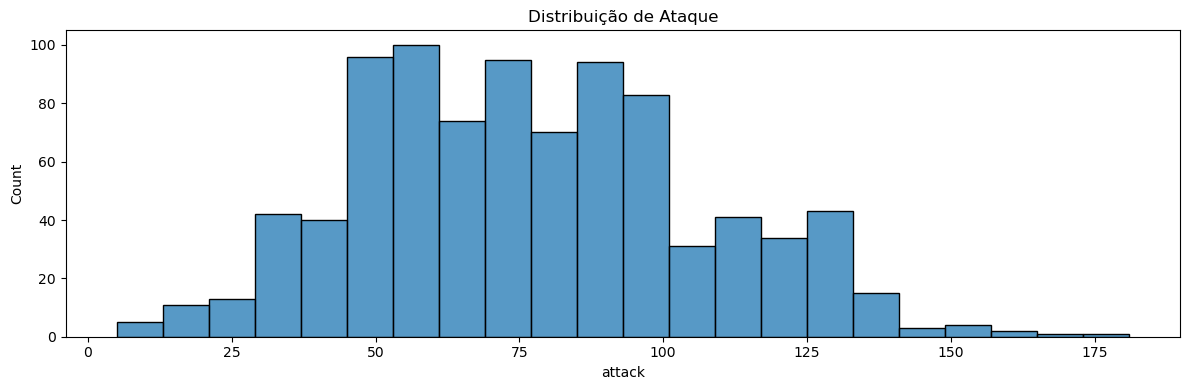

In [113]:
sns.histplot(pokemondf_subset['attack'])
plt.title("Distribuição de Ataque")
plt.show()

In [114]:
#which generation has the strongest pokemon? which has the weakest?
avg_basestats_by_gen = pokemondf_subset.groupby('gen')['base_stats'].mean().sort_values(ascending=False)
avg_basestats_by_gen

gen
VII     449.409091
IV      445.757009
VIII    432.359551
VI      429.305556
V       425.756410
I       407.642384
II      407.180000
III     403.725926
Name: base_stats, dtype: float64

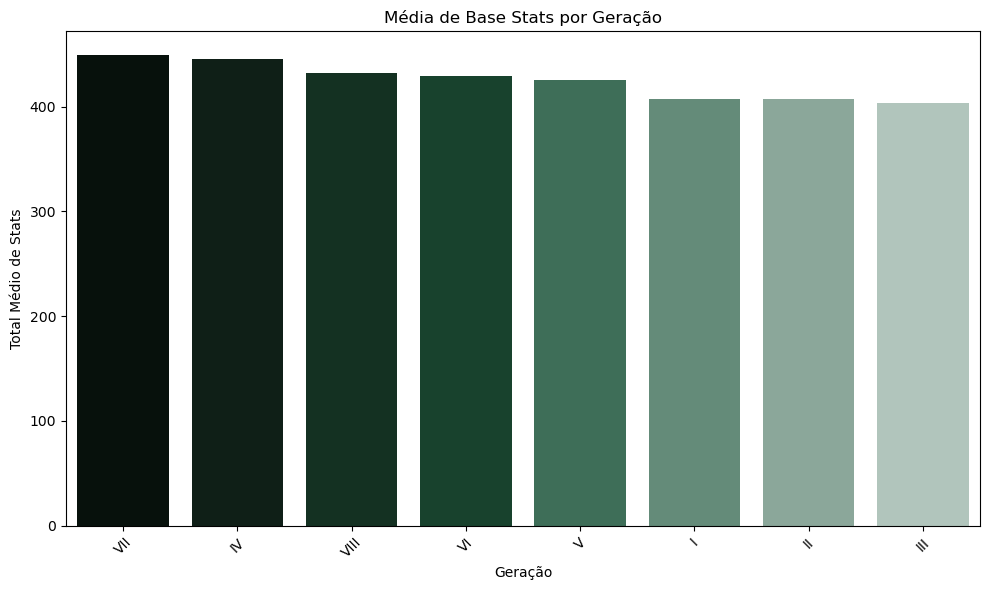

In [115]:
plt.figure(figsize=(10,6))
# Create a custom cubehelix palette
gen_stats_colors = ["#05130c","#0c2217", "#0f3622", "#11492d", "#367658", "#5e9179", "#86ac9a","#aec8bc"]
sns.barplot(
    x=avg_basestats_by_gen.index,
    y=avg_basestats_by_gen.values,
    hue=avg_basestats_by_gen.index,
    palette=gen_stats_colors[:8],
    legend=False
)
plt.title('Média de Base Stats por Geração')
plt.xlabel('Geração')
plt.ylabel('Total Médio de Stats')
plt.xticks(rotation=45)
plt.show()

In [116]:
print("Com base na média dos valores totais de stats, a Geração 7 possui os Pokémon mais fortes, enquanto a Geração 3 apresenta os mais fracos.")

Com base na média dos valores totais de stats, a Geração 7 possui os Pokémon mais fortes, enquanto a Geração 3 apresenta os mais fracos.


In [117]:
#what pokemon type is the strongest? the weakest?
avg_basestats_by_type = pokemondf_subset.groupby('primary_type')['base_stats'].mean().sort_values(ascending=False)
avg_basestats_by_type

primary_type
dragon      491.193548
steel       469.433333
psychic     449.775862
fire        443.672414
rock        439.340000
dark        436.333333
electric    434.591837
ghost       433.645161
ice         432.250000
fighting    427.416667
fairy       425.904762
ground      424.085714
flying      420.000000
water       417.138211
poison      412.457143
grass       407.918605
normal      396.614679
bug         373.480000
Name: base_stats, dtype: float64

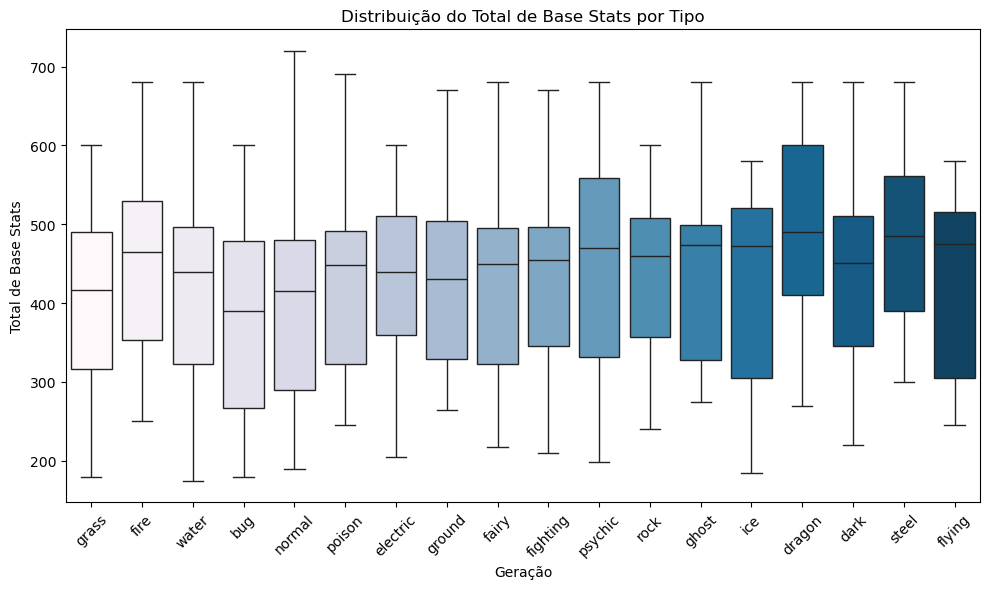

In [118]:
plt.figure(figsize=(10,6))
import matplotlib.pyplot as plt
cmap = plt.colormaps.get_cmap("PuBu")
pastel_gradient = [cmap(i / num_categories) for i in range(num_categories)]
sns.boxplot(
    x='primary_type',
    y='base_stats',
    data=pokemondf_subset,
    hue='primary_type',
    palette=pastel_gradient,
    dodge=False
)
plt.title('Distribuição do Total de Base Stats por Tipo')
plt.xlabel('Geração')
plt.ylabel('Total de Base Stats')
plt.xticks(rotation=45)
plt.show()

In [119]:
#is it possible to build a classifier to identify a legendary pokemon?

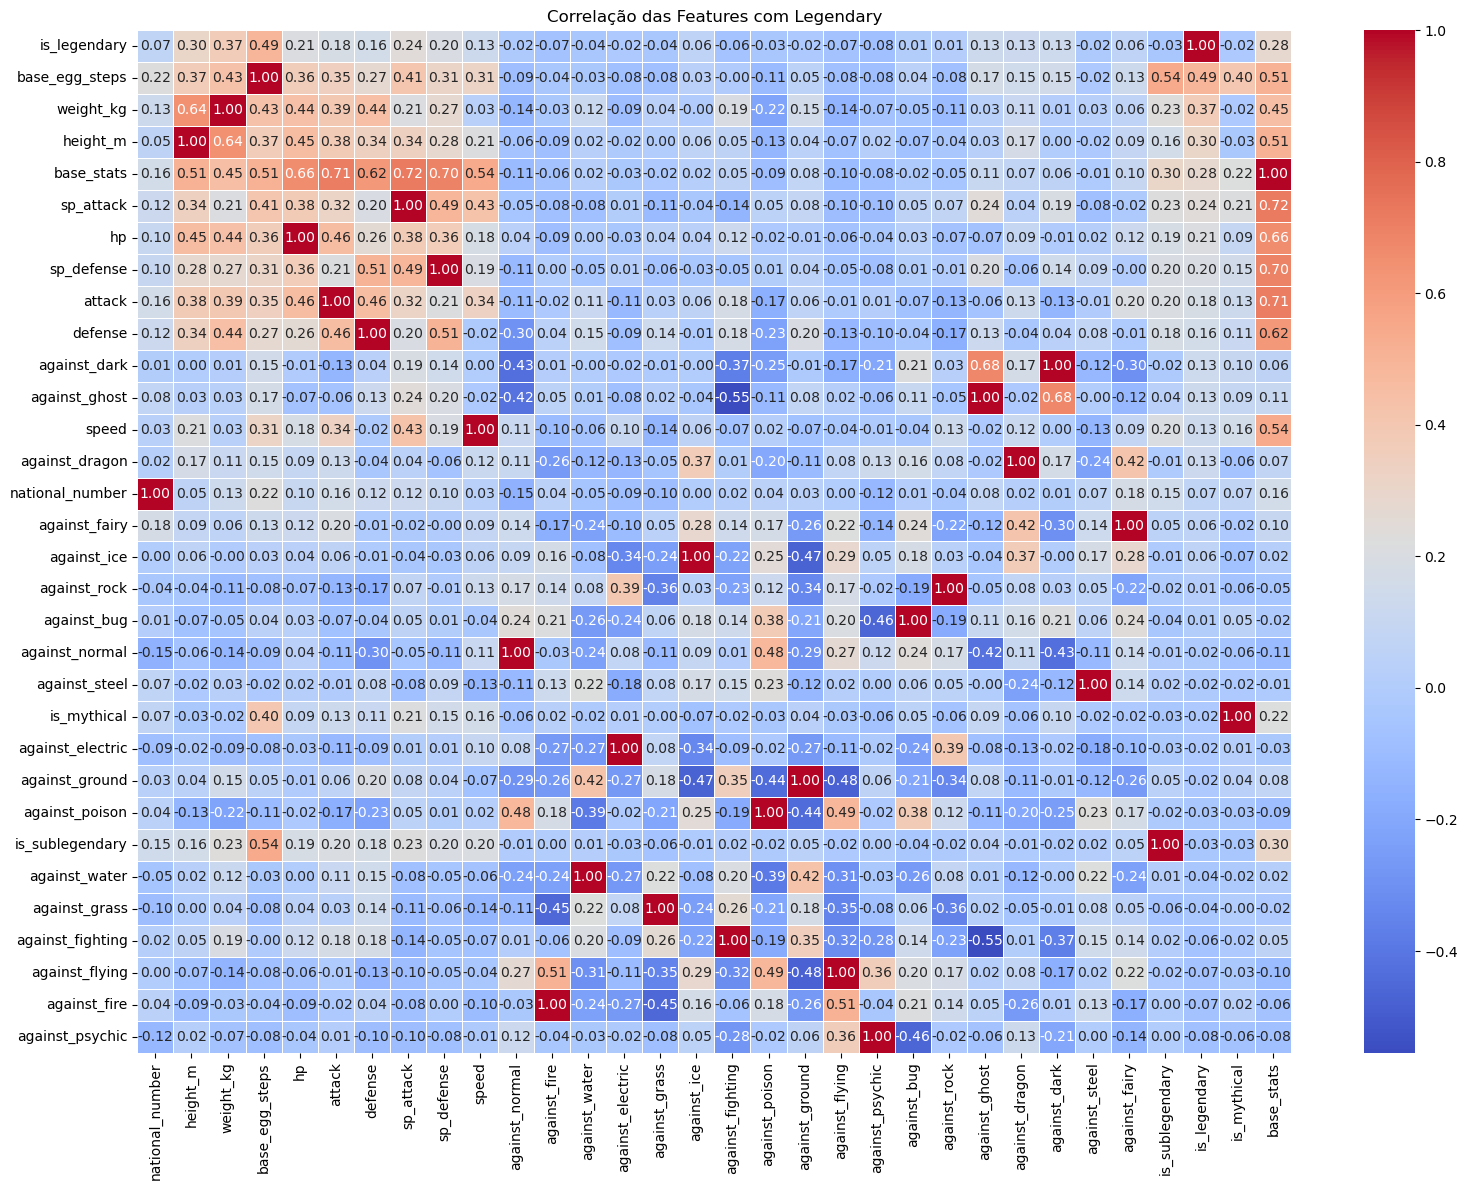

In [120]:
#verificando correlações entre pokemons lendários e outras com um heatmap
corr = pokemondf.corr(numeric_only=True)
plt.figure(figsize=(16, 12)) 
sns.heatmap(corr.sort_values(by='is_legendary', ascending=False), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação das Features com Legendary')
plt.show()

Text(0.5, 1.0, 'Distribuição de Pokémon Lendários por Tipo Primário')

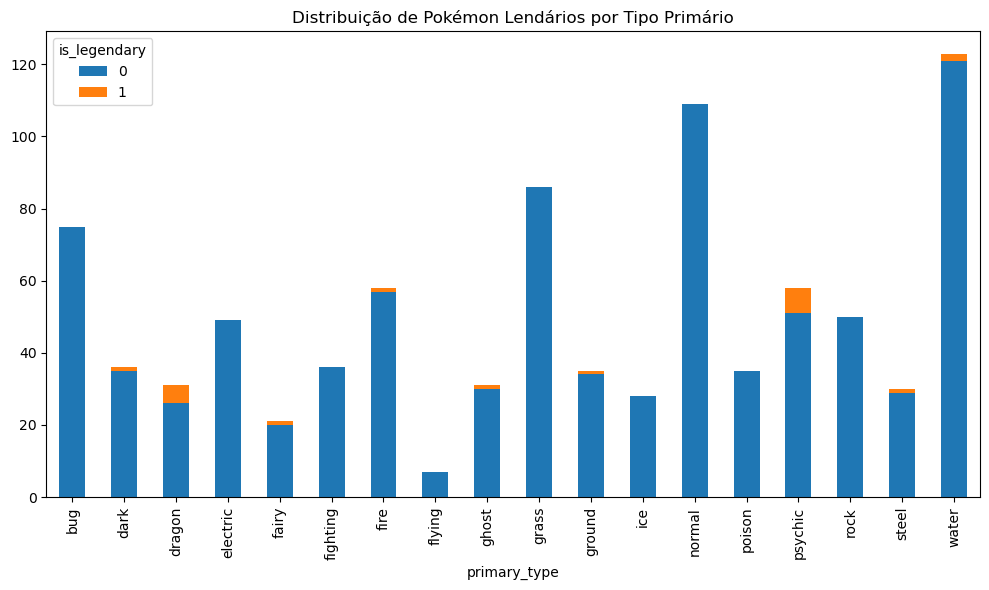

In [121]:
#verificar a importância de variáveis categóricas
pd.crosstab(pokemondf['primary_type'], pokemondf['is_legendary']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribuição de Pokémon Lendários por Tipo Primário')

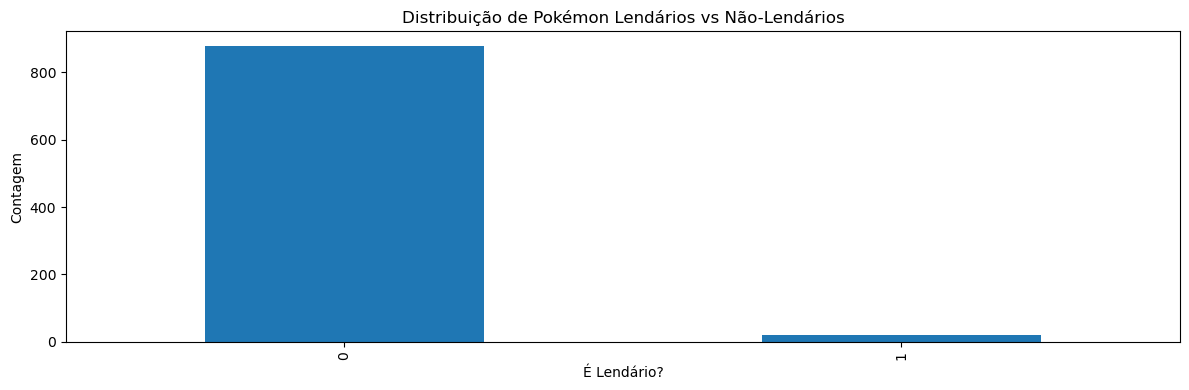

In [122]:
pokemondf['is_legendary'].value_counts().plot(kind='bar')
plt.title('Distribuição de Pokémon Lendários vs Não-Lendários')
plt.xlabel('É Lendário?')
plt.ylabel('Contagem')
plt.show()

In [123]:
#are there any correlations between physical traits and strengh stats (attack, defense, speed, etc)?